# Model Evaluation

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Classifier Models

### 1.1. Binary Classifiers

#### 1.1.1. Evaluating Binary Classifier Predictions

In [8]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=10000,
    n_features=3,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    random_state=1
)

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scorers = ['accuracy', 'precision', 'recall', 'f1']

logit = LogisticRegression()

for scorer in scorers:
    cv_score = cross_val_score(estimator=logit, X=X, y=y, scoring=scorer)
    print(f'{scorer}: {round(cv_score.mean(), 4)}')

accuracy: 0.9551
precision: 0.9587
recall: 0.9512
f1: 0.9549


#### 1.1.2. Evaluating Binary Classifier Thresholds

In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=10000,
    n_features=10,
    n_informative=3,
    n_classes=2,
    random_state=1
)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [75]:
y_probabilities = logit.predict_proba(X_test)

In [123]:
(y_probabilities[:, 0] + y_probabilities[:, 1])[0:5]

array([1., 1., 1., 1., 1.])

In [139]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_probabilities[:, 1])

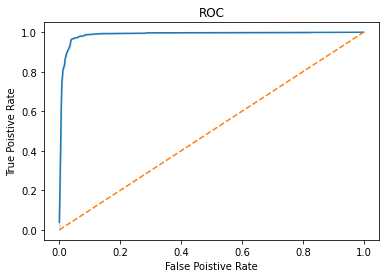

In [143]:
plt.title("ROC")
sns.lineplot(x=fpr, y=tpr)
sns.lineplot(x=[0, 1], y=[0, 1], ls='--')
plt.xlabel('False Poistive Rate')
plt.ylabel('True Poistive Rate')
plt.draw()

In [142]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probabilities[:, 1])

0.9878665966765373

### 1.2 Multiclass Classifiers

#### 1.2.1. Evaluating Multiclass Classifier Predictions

In [144]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=10000,
    n_features=3,
    n_informative=3,
    n_redundant=0,
    n_classes=3,
    random_state=1
)

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

scorers = ['accuracy', 'f1_macro']

logit = LogisticRegression()

for scorer in scorers:
    cv_score = cross_val_score(estimator=logit, X=X, y=y, scoring=scorer)
    print(f'{scorer}: {round(cv_score.mean(), 4)}')

accuracy: 0.8264
f1_macro: 0.8262


#### 1.2.2. Visualizing a Classifier's Performance

In [164]:
from sklearn.datasets import load_iris

In [169]:
iris = load_iris()
X, y, y_names = iris.data, iris.target, iris.target_names

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [182]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [183]:
y_predicted = logit.fit(X_train, y_train).predict(X_test)

In [190]:
from sklearn.metrics import confusion_matrix
from pandas import DataFrame

heatmap_df = DataFrame(confusion_matrix(y_test, y_predicted), index=y_names, columns=y_names)
heatmap_df

,setosa,versicolor,virginica
setosa,16,0,0
versicolor,0,10,1
virginica,0,0,11


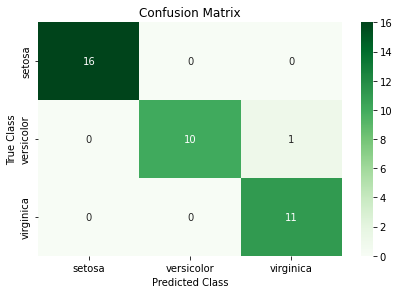

In [200]:
plt.title('Confusion Matrix')
plt.tight_layout()
ax = sns.heatmap(data=heatmap_df, annot=True, cmap='Greens')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')
plt.draw()

## 2. Regression Models

In [221]:
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=100,
    n_features=3,
    n_informative=3,
    n_targets=1,
    noise=50,
    coef=False,
    random_state=1
)

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_regression = LinearRegression()

scorers = ['r2', 'neg_mean_squared_error']

for scorer in scorers:
    print(f'{scorer}: {cross_val_score(estimator=linear_regression, X=X, y=y, scoring=scorer, n_jobs=-1).mean()}')

r2: 0.845219376572494
neg_mean_squared_error: -2114.63459482326
